<a href="https://colab.research.google.com/github/emircanbacanak/crypto_recommendation/blob/main/crypto_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tulipy


# Gerekli kütüphanlerin importu

In [15]:
import pandas as pd
import numpy as np
import tulipy as ti
import yfinance as yf
from datetime import datetime, timedelta

# Veriyi indir

In [16]:
end = datetime.now().strftime('%Y-%m-%d')
start = datetime.now() - pd.DateOffset(days=30)
data = yf.download("BTC-USD", start=start, end=end, interval="60m")
rsi_period = 14
close_prices = data['Close'].values

# RSI değerlerini hesapla
rsi_values = ti.rsi(close_prices, period=rsi_period)

buy_signal = rsi_values < 39
sell_signal = rsi_values > 83

# Al ve sat sinyallerinin olduğu zamanlardaki indeksleri bul
buy_indices = np.where(buy_signal)[0]
sell_indices = np.where(sell_signal)[0]

[*********************100%%**********************]  1 of 1 completed


# İki sinyal arasındaki fiyat farkını yüzde olarak hesaplar.
    


In [17]:
def calculate_price_difference_percentage(data):

    price_differences = []
    for i in range(len(data) - 1):
        price_diff = (data.iloc[i+1]['Close'] - data.iloc[i]['Close']) / data.iloc[i]['Close'] * 100
        price_differences.append(price_diff)
    return price_differences

# Al/Sat sinyallerinin doğruluk oranını hesaplar.

In [20]:
def calculate_accuracy(buy_indices, sell_indices, prices):
    correct_signals = 0
    total_signals = 0
    for buy_index in buy_indices:
        next_sell_index = next((sell_index for sell_index in sell_indices if sell_index > buy_index), None)
        if next_sell_index is not None:
            total_signals += 1
            if prices[next_sell_index] > prices[buy_index]:
                correct_signals += 1
    for sell_index in sell_indices:
        next_buy_index = next((buy_index for buy_index in buy_indices if buy_index > sell_index), None)
        if next_buy_index is not None:
            total_signals += 1
            if prices[next_buy_index] < prices[sell_index]:
                correct_signals += 1
    accuracy = correct_signals / total_signals * 100 if total_signals > 0 else 0
    return accuracy

# Txt ye kaydet

In [25]:
accuracy = calculate_accuracy(buy_indices, sell_indices, close_prices)
print(f"Al/Sat sinyallerinin doğruluk oranı: {accuracy:.2f}%")

output_file = "filtered_data.txt"

with open(output_file, "w") as file:
    file.write("Alım Sinyalleri:\n")
    for index in buy_indices:
        file.write(f"Tarih: {data.index[index]}, Fiyat: {close_prices[index]}\n")

    file.write("\nSatım Sinyalleri:\n")
    for index in sell_indices:
        file.write(f"Tarih: {data.index[index]}, Fiyat: {close_prices[index]}\n")

Al/Sat sinyallerinin doğruluk oranı: 81.82%


# Rsı da al-sat gösterme


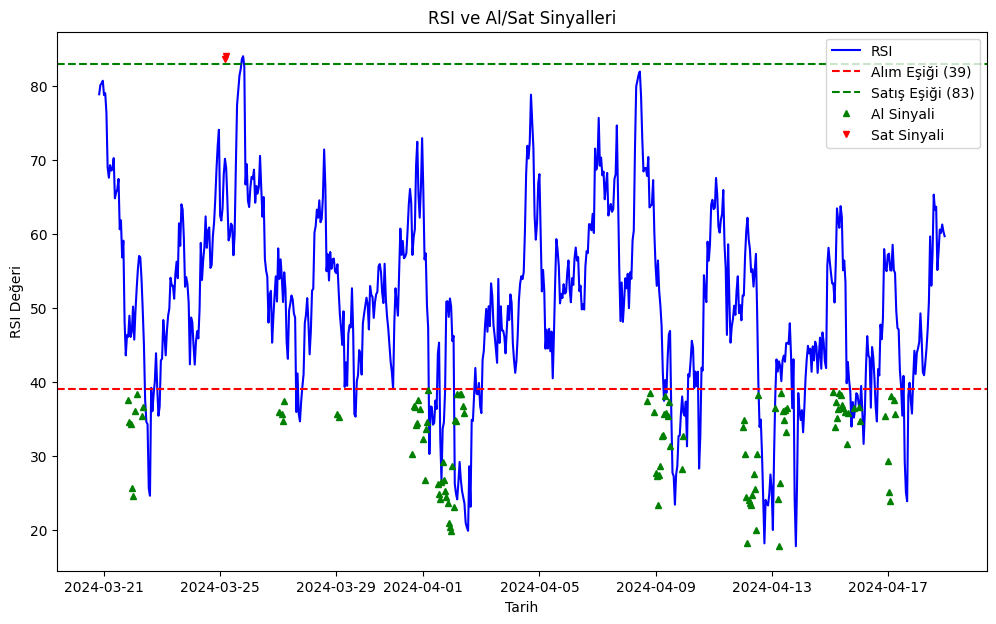

In [26]:
import matplotlib.pyplot as plt

rsi_length = len(rsi_values)

data_length = len(data)

plt.figure(figsize=(12, 7))
plt.plot(data.index[-rsi_length:], rsi_values, label='RSI', color='blue')
plt.axhline(y=39, color='r', linestyle='--', label='Alım Eşiği (39)')
plt.axhline(y=83, color='g', linestyle='--', label='Satış Eşiği (83)')

plt.plot(data.index[buy_indices[-rsi_length:]], rsi_values[buy_indices[-rsi_length:]], '^', markersize=5, color='green', label='Al Sinyali')

plt.plot(data.index[sell_indices[-rsi_length:]], rsi_values[sell_indices[-rsi_length:]], 'v', markersize=5, color='red', label='Sat Sinyali')

plt.title('RSI ve Al/Sat Sinyalleri')
plt.xlabel('Tarih')
plt.ylabel('RSI Değeri')
plt.legend()
plt.show()